In [1]:
import pandas as pd
import pylab as plt
import seaborn as sns
import numpy as np

In [2]:
salaries=pd.read_csv('../data/salaries_data.csv', encoding ='latin')
testeo=pd.read_csv('../data/testeo.csv',encoding='latin')

In [3]:
salaries2=salaries.drop(columns='salary_in_usd')

In [4]:
salaries2.shape

(500, 10)

In [5]:
salaries3= pd.concat([salaries2,testeo])

In [6]:
salaries3.shape

(607, 10)

In [7]:
salaries3.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,RO,0,US,L


In [8]:
salaries3.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Director of Data Science                      7
AI Scientist                                  7
Data Analytics Manager                        7
Principal Data Scientist                      7
Data Science Consultant                       7
Computer Vision Engineer                      6
Lead Data Engineer                            6
BI Data Analyst                               6
ML Engineer                                   6
Data Engineering Manager                      5
Business Data Analyst                         5
Applied Data Scientist                  

In [9]:
pd.set_option('display.max_rows', 500)
salaries3.groupby(['company_location', 'job_title']).agg({'salary':['mean','max','min','count']})

salary  \
                                                                   mean   
company_location job_title                                                
AE               Lead Data Scientist                       1.150000e+05   
                 Machine Learning Engineer                 9.250000e+04   
AS               AI Scientist                              1.335000e+06   
AT               Data Engineer                             6.500000e+04   
                 Data Scientist                            6.600000e+04   
                 Research Scientist                        5.900000e+04   
AU               Computer Vision Software Engineer         1.500000e+05   
                 Data Scientist                            1.200000e+05   
                 Machine Learning Engineer                 1.210000e+05   
BE               Machine Learning Engineer                 7.250000e+04   
BR               Computer Vision Engineer                  6.300000e+04   
                 Data Scientist                            6.960000e+04   
CA               Applied Data Scientist                    6.800000e+04   
                 Big Data Architect                        1.250000e+05   
                 Business Data Analyst                     9.000000e+04   
                 Data Analyst                              8.351111e+04   
                 Data Architect                            1.415500e+05   
                 Data Science Engineer                     1.595000e+05   
                 Data Scientist                            9.790000e+04   
                 Director of Data Science                  2.500000e+05   
                 Lead Data Engineer                        1.500000e+05   
                 Machine Learning Developer                1.000000e+05   
                 Machine Learning Manager                  1.570000e+05   
                 Machine Learning Scientist                2.250000e+05   
                 Principal Data Analyst                    7.500000e+04   
                 Research Scientist                        1.451667e+05   
CH               Big Data Engineer                         4.350000e+05   
                 Data Scientist                            1.150000e+05   
CL               Data Scientist                            3.040000e+07   
CN               Machine Learning Engineer                 2.990000e+05   
                 Research Scientist                        1.000000e+05   
CO               Machine Learning Engineer                 2.184400e+04   
CZ               Applied Machine Learning Scientist        2.900000e+04   
                 Research Scientist                        6.999900e+04   
DE               Data Analyst                              5.400000e+04   
                 Data Analytics Engineer                   6.700000e+04   
                 Data Engineer                             5.145000e+04   
                 Data Engineering Manager                  5.199900e+04   
                 Data Science Consultant                   6.133333e+04   
                 Data Scientist                            5.976000e+04   
                 Director of Data Science                  1.150000e+05   
                 Lead Machine Learning Engineer            8.000000e+04   
                 ML Engineer                               1.400000e+04   
                 Machine Learning Engineer                 6.650000e+04   
                 Principal Data Scientist                  1.416667e+05   
DK               AI Scientist                              3.000000e+05   
                 Computer Vision Engineer                  1.800000e+05   
                 Marketing Data Analyst                    7.500000e+04   
DZ               Data Scientist                            1.000000e+05   
EE               Head of Data                              3.000000e+04   
ES               AI Scientist                              5.500000e+04   
               

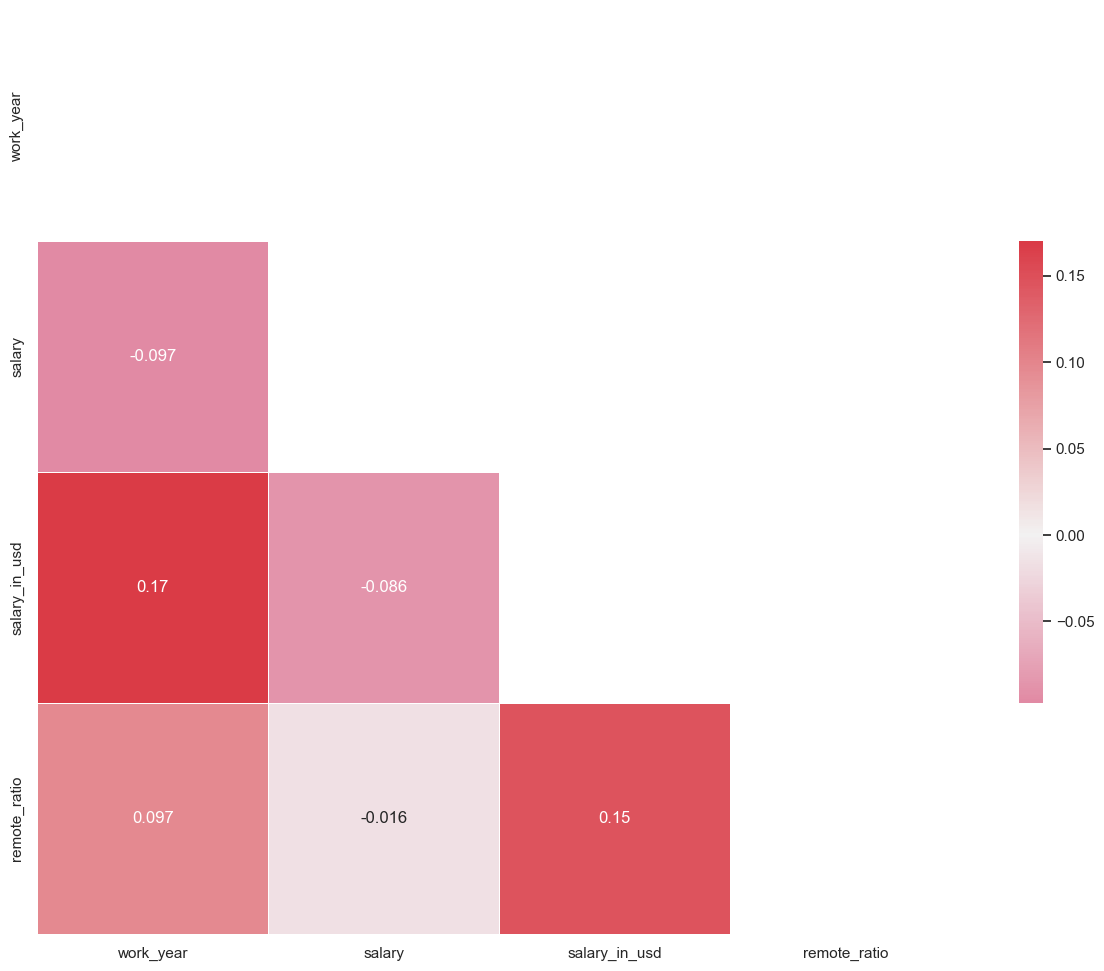

In [10]:
# buscando colinealidad

plt.figure(figsize=(15,12))

sns.set(style='white')

mask=np.triu(np.ones_like(salaries.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(salaries.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [11]:
salaries3.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [12]:
for c in salaries3.columns:       #valores unicos de cada columna
    
    columna=c
    
    print(c,'- valores únicos: ',len(salaries3[columna].unique()))

work_year - valores únicos:  3
experience_level - valores únicos:  4
employment_type - valores únicos:  4
job_title - valores únicos:  50
salary - valores únicos:  272
salary_currency - valores únicos:  17
employee_residence - valores únicos:  57
remote_ratio - valores únicos:  3
company_location - valores únicos:  50
company_size - valores únicos:  3


In [13]:
salaries3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 106
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   employee_residence  607 non-null    object
 7   remote_ratio        607 non-null    int64 
 8   company_location    607 non-null    object
 9   company_size        607 non-null    object
dtypes: int64(3), object(7)
memory usage: 52.2+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

salaries3.experience_level=LabelEncoder().fit_transform(salaries3.experience_level)

salaries3.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2022,3,FT,Data Engineer,140250,USD,US,100,US,M
1,2022,3,FT,Data Engineer,135000,USD,US,100,US,M
2,2021,2,FT,BI Data Analyst,100000,USD,US,100,US,M
3,2021,2,CT,ML Engineer,270000,USD,US,100,US,L
4,2021,2,FT,Data Engineer,22000,EUR,RO,0,US,L


In [15]:
salaries3.employment_type=LabelEncoder().fit_transform(salaries3.employment_type)

salaries3.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2022,3,2,Data Engineer,140250,USD,US,100,US,M
1,2022,3,2,Data Engineer,135000,USD,US,100,US,M
2,2021,2,2,BI Data Analyst,100000,USD,US,100,US,M
3,2021,2,0,ML Engineer,270000,USD,US,100,US,L
4,2021,2,2,Data Engineer,22000,EUR,RO,0,US,L


In [16]:
salaries3.job_title=LabelEncoder().fit_transform(salaries3.job_title)

salaries3.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2022,3,2,17,140250,USD,US,100,US,M
1,2022,3,2,17,135000,USD,US,100,US,M
2,2021,2,2,5,100000,USD,US,100,US,M
3,2021,2,0,36,270000,USD,US,100,US,L
4,2021,2,2,17,22000,EUR,RO,0,US,L


In [17]:
salaries3.salary_currency=LabelEncoder().fit_transform(salaries3.salary_currency)

salaries3.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2022,3,2,17,140250,16,US,100,US,M
1,2022,3,2,17,135000,16,US,100,US,M
2,2021,2,2,5,100000,16,US,100,US,M
3,2021,2,0,36,270000,16,US,100,US,L
4,2021,2,2,17,22000,7,RO,0,US,L


In [18]:
salaries3.employee_residence=LabelEncoder().fit_transform(salaries3.employee_residence)

salaries3.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2022,3,2,17,140250,16,55,100,US,M
1,2022,3,2,17,135000,16,55,100,US,M
2,2021,2,2,5,100000,16,55,100,US,M
3,2021,2,0,36,270000,16,55,100,US,L
4,2021,2,2,17,22000,7,47,0,US,L


In [19]:
salaries3.company_location=LabelEncoder().fit_transform(salaries3.company_location)

salaries3.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2022,3,2,17,140250,16,55,100,48,M
1,2022,3,2,17,135000,16,55,100,48,M
2,2021,2,2,5,100000,16,55,100,48,M
3,2021,2,0,36,270000,16,55,100,48,L
4,2021,2,2,17,22000,7,47,0,48,L


In [20]:
salaries3.company_size=LabelEncoder().fit_transform(salaries3.company_size)

salaries3.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2022,3,2,17,140250,16,55,100,48,1
1,2022,3,2,17,135000,16,55,100,48,1
2,2021,2,2,5,100000,16,55,100,48,1
3,2021,2,0,36,270000,16,55,100,48,0
4,2021,2,2,17,22000,7,47,0,48,0


In [21]:
from sklearn.preprocessing import StandardScaler
salaries_nor=pd.DataFrame(StandardScaler().fit_transform(salaries3._get_numeric_data()),  # standardize numeric columns
                      columns=salaries3._get_numeric_data().columns)

In [22]:
salaries_nor.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,0.859977,0.843493,0.027854,-0.379279,-0.119080,0.679021,0.799156,0.714862,0.756121,0.289918
1,0.859977,0.843493,0.027854,-0.379279,-0.122482,0.679021,0.799156,0.714862,0.756121,0.289918
2,-0.586023,-0.124371,0.027854,-1.518522,-0.145164,0.679021,0.799156,0.714862,0.756121,0.289918
3,-0.586023,-0.124371,-8.425971,1.424523,-0.034995,0.679021,0.799156,0.714862,0.756121,-1.240346
4,-0.586023,-0.124371,0.027854,-0.379279,-0.195712,-1.378378,0.361005,-1.743615,0.756121,-1.240346


In [23]:
salaries_nor=salaries_nor[0:501]
salaries_nor.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,0.859977,0.843493,0.027854,-0.379279,-0.119080,0.679021,0.799156,0.714862,0.756121,0.289918
1,0.859977,0.843493,0.027854,-0.379279,-0.122482,0.679021,0.799156,0.714862,0.756121,0.289918
2,-0.586023,-0.124371,0.027854,-1.518522,-0.145164,0.679021,0.799156,0.714862,0.756121,0.289918
3,-0.586023,-0.124371,-8.425971,1.424523,-0.034995,0.679021,0.799156,0.714862,0.756121,-1.240346
4,-0.586023,-0.124371,0.027854,-0.379279,-0.195712,-1.378378,0.361005,-1.743615,0.756121,-1.240346


In [24]:
salaries_nor.to_csv('../data/salaries_nor.csv')

In [25]:
testeo_nor=salaries_nor[501:]
testeo_nor=testeo.reset_index().drop('index', axis=1)
testeo_nor.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2020,SE,FT,Machine Learning Scientist,260000,USD,JP,0,JP,S
1,2020,MI,FT,Lead Data Analyst,87000,USD,US,100,US,L
2,2020,MI,FT,Data Analyst,85000,USD,US,100,US,L
3,2020,MI,FT,Machine Learning Engineer,299000,CNY,CN,0,CN,M
4,2020,MI,FT,Product Data Analyst,450000,INR,IN,100,IN,L


In [26]:
testeo_nor.to_csv('../data/testeo_nor.csv')